## Inicio

In [25]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt

## Cargar datos

In [26]:
games = pd.read_csv("/datasets/games.csv")

In [27]:
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Aquí podemos ver que las columnas relacionadas a ventas y plataforma, no presentan espacios vacíos. 

En cambio, el resto de las columnas si presenta espacios vacíos.

Lo que haremos en la limpieza de datos será:

* Verificar si hay duplicados, en caso de que los haya, buscar una solución.
* Controlar los espacios vacios. Para cada columna se revisará si existen espacios vacíos, y se buscara la manera de tratarlos (rellenarlos o dejarlos así).
* Cambiar el formato de fecha a date, lo cual nos facilitará posteriores análisis.


## Preparar los datos


### Reemplazar los nombres de las columnas (poner en minúsculas).

In [29]:
# Reemplazar los nombres de las columnas (poner en minúsculas).

new_columns=[]

for name in games.columns:
    new_columns.append(name.lower())
    
games.columns = new_columns

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Convertir los datos en los tipos necesarios.

In [30]:
#Convertir los datos en los tipos necesarios.

games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()

#games["year_of_release"] = games["year_of_release"].dt.year.astype("Int64")

print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform  

In [31]:
# Reemplazar 'tbd' con 0
games['user_score'] = games['user_score'].replace('tbd', '0')

# Si hay comas como separadores decimales, reemplazarlas por puntos
games['user_score'] = games['user_score'].str.replace(',', '.', regex=False)

# Convertir a float
games['user_score'] = games['user_score'].astype('float')

# Verificar el resultado
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Lo que hicimos hasta aquí fue:

* Los nombres de las columnas ahora son minúsculas, ya que eso facilita el análisis. La probabilidad de cometer errores al llamar a las columnas es menor.
* Convertimos el tipo de dato de year_of_release a integer, ya que facilita la realización de cálculos y análisis (no lo convertimos a datetime, ya que como solo hay años, esto puede generar errores posteriores)

### Manejo de espacios vacios

In [32]:
print(games['name'].unique())
print()
print(games['year_of_release'].unique())
print()
print(games['genre'].unique())
print()
print(games['critic_score'].unique())
print()
print(games['user_score'].unique())
print()
print(games['rating'].unique())
print()
print(games['platform'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  

De esta manera procederemos con los datos vacios 

* name: los rellenaremos con "unknown", esto lo hacemos porque son datos object.
* year_of_release: los rellenaremos con "0", ya que son datos numericos, que quizas luego usaremos para hacer calculos.
* genre: los rellenaremos con "unknown", esto lo hacemos porque son datos object.
* critic_score: los rellenaremos con "0", ya que son datos numericos, que quizas luego usaremos para hacer calculos.
* user_score: los rellenaremos con "0", ya que son datos numericos, que quizas luego usaremos para hacer calculos.
* rating: los rellenaremos con "unknown", esto lo hacemos porque son datos object.

Preferimos no dejar en blanco las celdas, ya que esto puede generar posibles errores luego en la realización de cálculos, análisis y gráficos. 

Creemos que hay espacios en blanco por:

* Por errores en el software
* Errores al convertir los datos de un formato a otro.


Para facilitar los calculos posteriores, los valores 'tbd' en en user_score, seran reemplazados por 0.

In [33]:
# reemplazo de NaN 

games['name'] = games['name'].fillna('unknown')
games['year_of_release']=games['year_of_release'].fillna(0)
games['genre']=games['genre'].fillna('unknown')
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna('unknown')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [34]:
# Calcular las ventas totales (la suma de las ventas en todas las regiones) 
#para cada juego y colocar estos valores en una columna separada.
    
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           0.0         0.0  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           0.0         0.0  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

## Analiza los datos


### Mirar cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [35]:
# Mirar cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

game_by_year= games.groupby('year_of_release')['name'].count()
print(game_by_year)
print()
print('La media es:',game_by_year.mean())
print('La mediana es:',game_by_year.median())

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

La media es: 439.86842105263156
La mediana es: 313.5


In [36]:
#game_by_year_df = game_by_year.reset_index()
#game_by_year_df.plot(x='year_of_release',y='name',figsize=[8,8])
#plt.show()

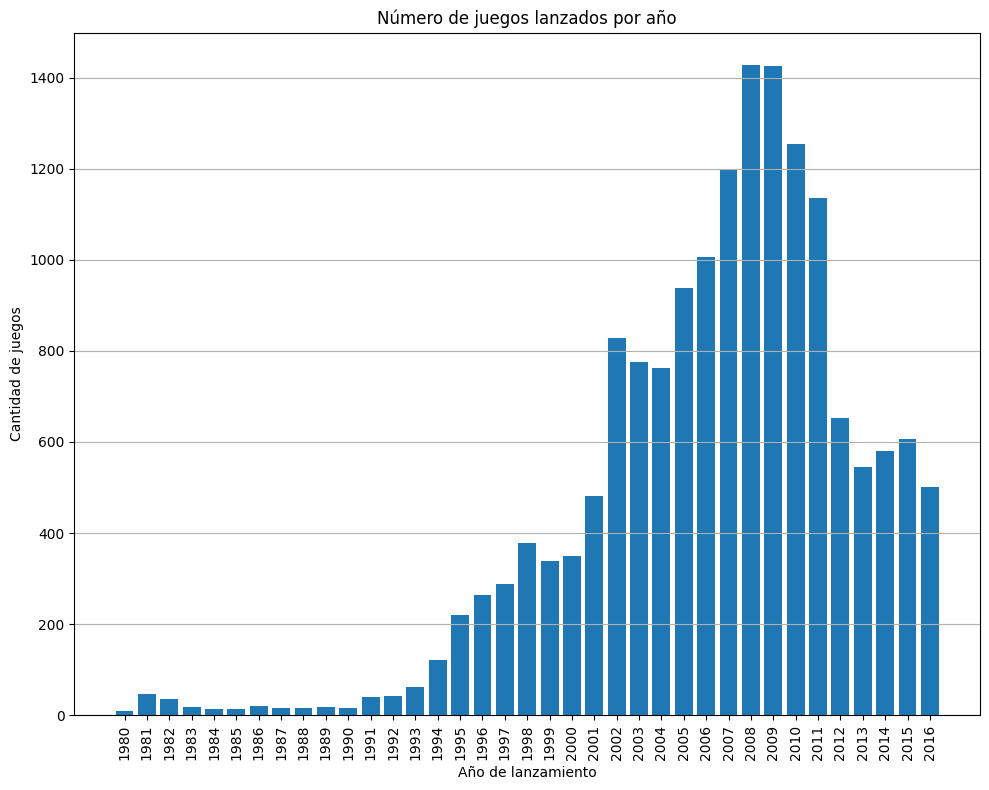

In [37]:
# Filtrar el valor 0 si es un año no válido
game_by_year_df = game_by_year.reset_index()
game_by_year_df = game_by_year_df[game_by_year_df['year_of_release'] != 0]

# Ordenar por año para asegurar que el gráfico sea cronológico
game_by_year_df = game_by_year_df.sort_values('year_of_release')

# Crear el gráfico usando plt directamente
plt.figure(figsize=(10, 8))
plt.bar(range(len(game_by_year_df)), game_by_year_df['name'])
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(axis='y')

# Añadir los años como etiquetas en el eje x
plt.xticks(range(len(game_by_year_df)), game_by_year_df['year_of_release'], rotation=90)

plt.tight_layout()
plt.show()

Podemos ver que:

* Los años entre 2006 y 2011 fueron los años en los que más juegos fueron sacados.
* A partir del año 2012, la cantidad de juegos publicados disminuyó.
* Los años 2008 y 2009 fueron los años con mayor número de juegos lanzados.

La diferencia si es bastante considerable, si comparamos los años 2006 a 2011 con el resto. Pero al fijarnos en la media y la mediana, no hay una diferencia tan considerable entre ellas.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [39]:
#agrupar las ventas totales por plataforma
sales_platform = games.groupby('platform')['total_sales'].sum()
print(sales_platform)

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64


In [40]:
#Calcular el top 10
top10_platforms = sales_platform.sort_values(ascending=False).head(10)
print(top10_platforms)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


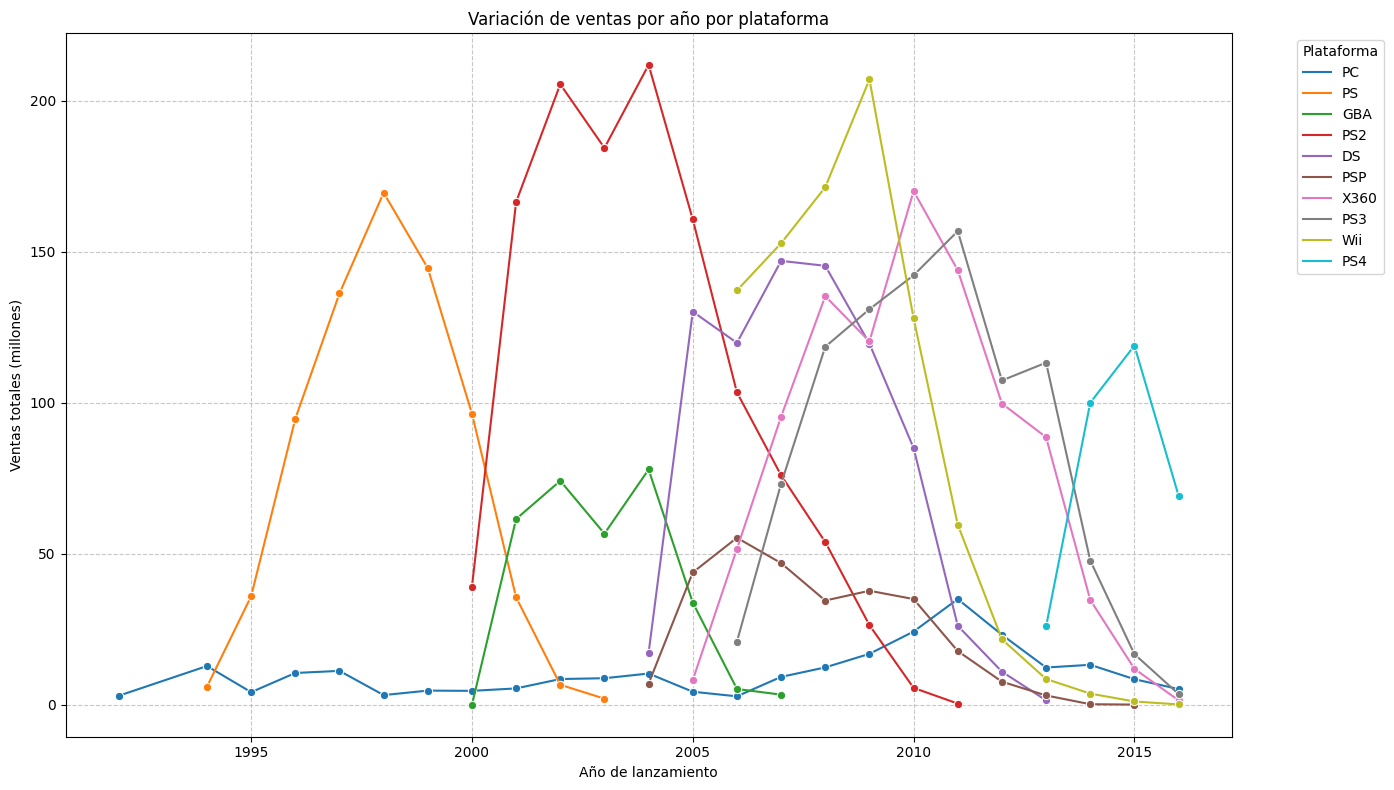

In [41]:
import seaborn as sns

top_platform_list = top10_platforms.index
filtered_games = games[games['platform'].isin(top_platform_list)]

sales_by_year_top10 = filtered_games.groupby(['year_of_release','platform'])['total_sales'].sum()

# Resetear el índice para tener año y plataforma como columnas
df_sales_top10 = sales_by_year_top10.reset_index()

# Filtrar años después de 1990 para mejor visualización
df_sales_top10_recent = df_sales_top10.query('year_of_release > 1990')

# Crear el gráfico con una línea para cada plataforma
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_sales_top10_recent, x='year_of_release', y='total_sales', hue='platform', marker='o')

# Personalizar el gráfico
plt.title('Variación de ventas por año por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [42]:
#cuales son las plataformas mas antiguas

last_year_sales = games.groupby("platform")["year_of_release"].max()
print(last_year_sales.sort_values(ascending=True))  # Ordenar para ver las más antiguas


platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016
Name: year_of_release, dtype: Int64


In [43]:
#vida de una plataforma
platform_lifetime = games.groupby("platform")["year_of_release"].agg(["min", "max"])
platform_lifetime["lifetime"] = platform_lifetime["max"] - platform_lifetime["min"]
print(platform_lifetime.sort_values(by="lifetime", ascending=False))


           min   max  lifetime
platform                      
3DS          0  2016      2016
X360         0  2016      2016
Wii          0  2016      2016
PSV          0  2016      2016
PC           0  2016      2016
PS3          0  2016      2016
PSP          0  2015      2015
DS           0  2013      2013
PS2          0  2011      2011
XB           0  2008      2008
GBA          0  2007      2007
GC           0  2007      2007
PS           0  2003      2003
N64          0  2002      2002
GB           0  2001      2001
2600         0  1989      1989
NES       1983  1994        11
DC        1998  2008        10
SNES      1990  1999         9
SAT       1994  1999         5
WiiU      2012  2016         4
GEN       1990  1994         4
PS4       2013  2016         3
NG        1993  1996         3
XOne      2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
PCFX      1996  1996         0
TG16      1995  1995         0
GG      

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Elegiremos los datos de los últimos 5 años.

In [44]:
last_5_years = games.query('year_of_release>2010')
print(last_5_years)

                                 name platform  year_of_release         genre  \
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
31          Call of Duty: Black Ops 3      PS4             2015       Shooter   
33                Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  

*A partir de ahora, usaremos "last_5_years"*

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [45]:
#agrupar las ventas totales por plataforma
sales_platform_5 = last_5_years.groupby('platform')['total_sales'].sum()
print(sales_platform_5)

platform
3DS     257.81
DS       38.73
PC       97.68
PS2       0.45
PS3     445.57
PS4     314.14
PSP      29.01
PSV      53.81
Wii      95.02
WiiU     82.19
X360    380.38
XOne    159.32
Name: total_sales, dtype: float64


In [46]:
top_sales_5 = sales_platform_5.sort_values(ascending=False).head(5)
print(top_sales_5)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
Name: total_sales, dtype: float64


In [47]:
least_platforms = sales_platform_5.sort_values(ascending=True).head(5)
print(least_platforms)

platform
PS2      0.45
PSP     29.01
DS      38.73
PSV     53.81
WiiU    82.19
Name: total_sales, dtype: float64


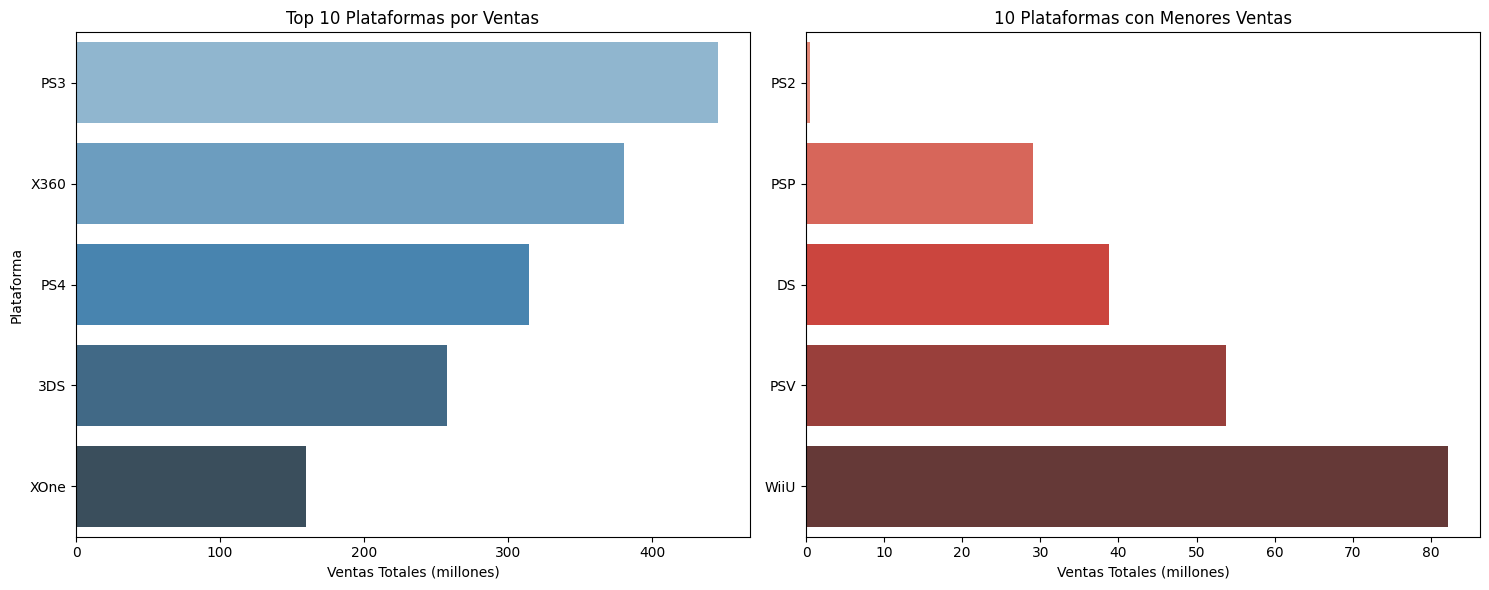

In [48]:
import seaborn as sns

# Combinar ambos DataFrames
combined_platforms = pd.concat([top_sales_5, least_platforms])

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para las plataformas con mayores ventas
sns.barplot(x=top_sales_5.values, y=top_sales_5.index, ax=ax1, palette='Blues_d')
ax1.set_title('Top 10 Plataformas por Ventas')
ax1.set_xlabel('Ventas Totales (millones)')
ax1.set_ylabel('Plataforma')

# Gráfico para las plataformas con menores ventas
sns.barplot(x=least_platforms.values, y=least_platforms.index, ax=ax2, palette='Reds_d')
ax2.set_title('10 Plataformas con Menores Ventas')
ax2.set_xlabel('Ventas Totales (millones)')
ax2.set_ylabel('')  # No repetimos la etiqueta del eje Y

plt.tight_layout()
plt.show()

Como podemos ver en los graficos, las plataformas pertenecientes al top 10 tienen mejores ventas. Es por eso que se elegiran esas plataformas:

* PS3
* X360
* PS4
* 3DS
* XOne

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [49]:
#print(sales_platform)
#sns.boxplot(y=sales_platform_5,orient='v')
#plt.show()

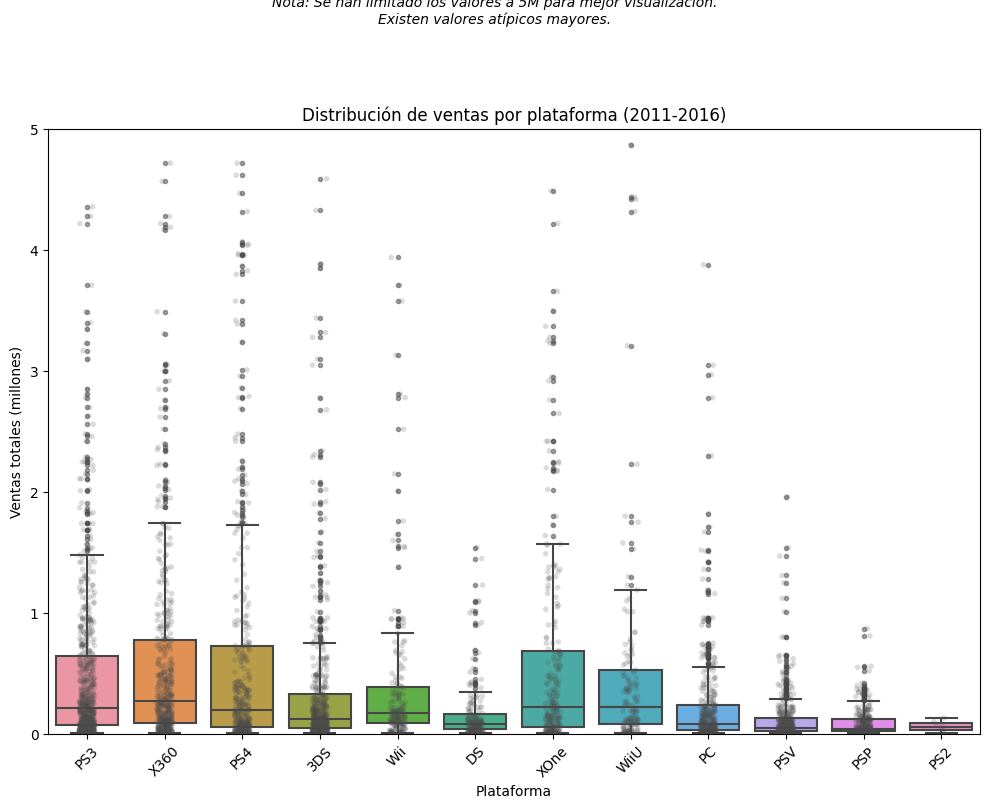

In [50]:
# Crear el boxplot con mejor legibilidad
plt.figure(figsize=(10, 8))

# Usar un boxplot con opciones personalizadas
ax = sns.boxplot(x='platform', y='total_sales', data=last_5_years, 
                 flierprops={'marker': 'o', 'markersize': 3, 'alpha': 0.5})

# Añadir también puntos para ver la distribución de los datos
sns.stripplot(x='platform', y='total_sales', data=last_5_years, 
              size=4, color='.3', alpha=0.2, jitter=True)

# Limitar el eje Y para ver mejor las cajas (ajusta estos valores según tus datos)
plt.ylim(0, 5)  # Muestra ventas de 0 a 5 millones

# Añadir título y etiquetas
plt.title('Distribución de ventas por plataforma (2011-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)

# Añadir anotación para explicar los límites
plt.annotate('Nota: Se han limitado los valores a 5M para mejor visualización.\nExisten valores atípicos mayores.', 
             xy=(0.5, 0.97), xycoords='figure fraction', 
             ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

Hallazgos:

* Todas las plataformas presentan valores atípicos.
* La mayoría de las plataformas tienen sus datos concentrados en ventas bajas (cajas cercanas a 0).
* Las plataformas con mayores ventas son PS3, X360, PS4, XOne.
* Varios boxplot tienen datos sesgados a la izquierda, por lo que podemos deducir que la media es menor a la mediana.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.


In [51]:
#games.info()

In [52]:
#print(games.head())

In [53]:
#top10_platform_list = top10_platforms.index
#filtered_10_games = games[games['platform'].isin(top10_platform_list)]

#score_platform = filtered_10_games.groupby('platform')['critic_score','user_score'].sum()
#print(score_platform)

In [54]:
score_platforms = last_5_years.groupby('platform')['critic_score','user_score'].sum()
print(score_platforms.sort_values(by=['critic_score','user_score'],ascending=False))

          critic_score  user_score
platform                          
PS3            24820.0      2757.4
PC             21632.0      1980.7
X360           20670.0      2304.7
PS4            18167.0      1734.3
XOne           12392.0      1186.9
3DS            11148.0      1171.7
PSV             8417.0      1041.5
WiiU            6366.0       690.4
Wii             3244.0       394.5
DS              1309.0        90.8
PSP              984.0       107.6
PS2                0.0        17.8


In [55]:
ps3_graphic = last_5_years[last_5_years['platform']=='PS3']
print(ps3_graphic)

                                 name platform  year_of_release      genre  \
16                 Grand Theft Auto V      PS3             2013     Action   
34         Call of Duty: Black Ops II      PS3             2012    Shooter   
37     Call of Duty: Modern Warfare 3      PS3             2011    Shooter   
69               Call of Duty: Ghosts      PS3             2013    Shooter   
81                     FIFA Soccer 13      PS3             2012     Action   
...                               ...      ...              ...        ...   
16628        Akatsuki no Goei Trinity      PS3             2012  Adventure   
16638             Tour de France 2014      PS3             2014     Sports   
16674   Tsukigime Ranko's Longest Day      PS3             2014     Action   
16691    Dynasty Warriors: Eiketsuden      PS3             2016     Action   
16710   Samurai Warriors: Sanada Maru      PS3             2016     Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

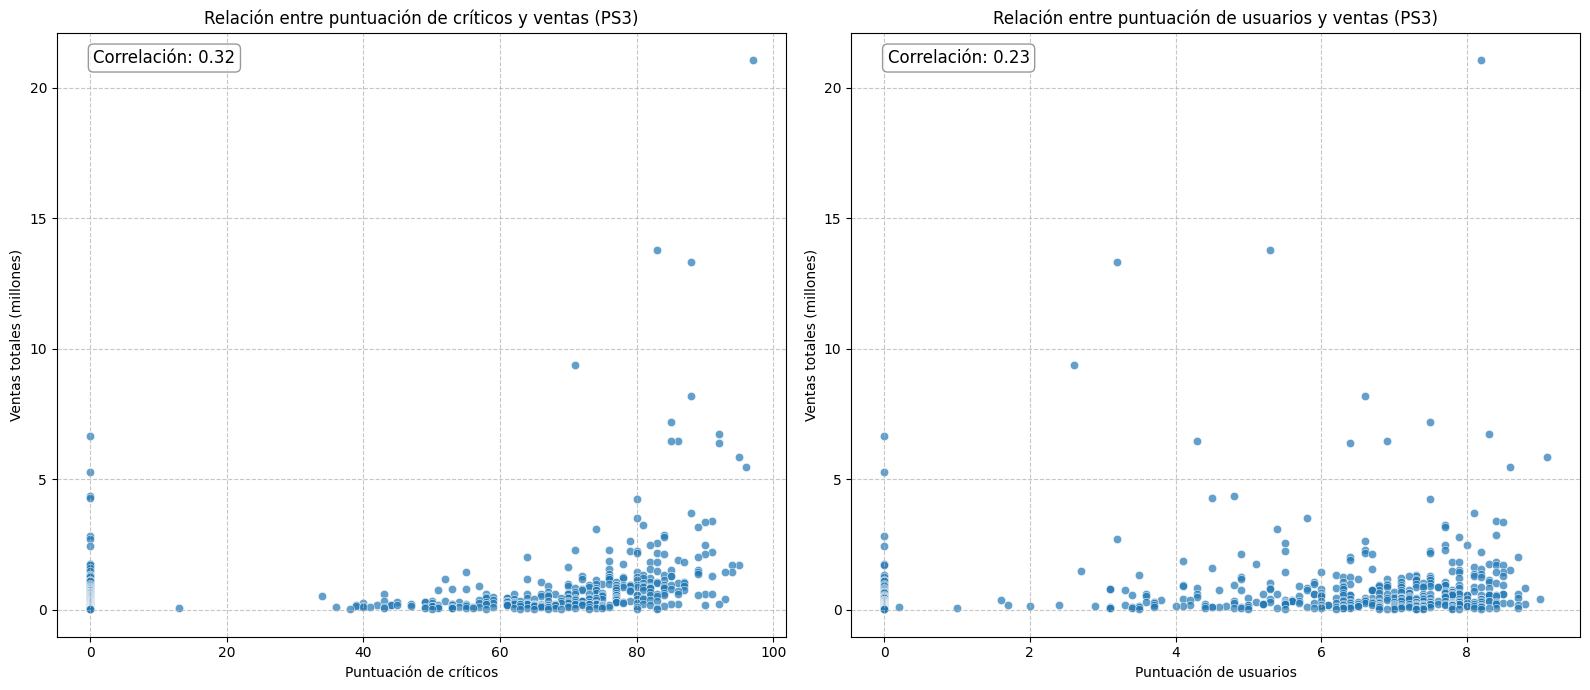

Correlación entre puntuación de críticos y ventas: 0.3243
Correlación entre puntuación de usuarios y ventas: 0.2299


In [56]:
# Filtrar solo los juegos de PS3 que tienen puntuaciones completas
ps3_graphic = last_5_years[last_5_years['platform'] == 'PS3'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Crear subplots para mostrar dos gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico de dispersión para puntuaciones de críticos vs ventas
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_graphic, ax=axes[0], alpha=0.7)
axes[0].set_title('Relación entre puntuación de críticos y ventas (PS3)')
axes[0].set_xlabel('Puntuación de críticos')
axes[0].set_ylabel('Ventas totales (millones)')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Calcular y mostrar la correlación
corr_critic = ps3_graphic['critic_score'].corr(ps3_graphic['total_sales'])
axes[0].annotate(f'Correlación: {corr_critic:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Gráfico de dispersión para puntuaciones de usuarios vs ventas
sns.scatterplot(x='user_score', y='total_sales', data=ps3_graphic, ax=axes[1], alpha=0.7)
axes[1].set_title('Relación entre puntuación de usuarios y ventas (PS3)')
axes[1].set_xlabel('Puntuación de usuarios')
axes[1].set_ylabel('Ventas totales (millones)')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Calcular y mostrar la correlación
corr_user = ps3_graphic['user_score'].corr(ps3_graphic['total_sales'])
axes[1].annotate(f'Correlación: {corr_user:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

# Imprimir los coeficientes de correlación para tener los valores exactos
print(f"Correlación entre puntuación de críticos y ventas: {corr_critic:.4f}")
print(f"Correlación entre puntuación de usuarios y ventas: {corr_user:.4f}")

*En este gráfico, podemos ver que para el juego PS3 la correlación entre las críticas y ventas es baja. Esto quiere decir que, como podemos ver en el gráfico, a pesar de que el juego tiene buenas críticas por de los usuarios y críticos, las ventas no son muy altas.*

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [57]:
juegos_plat= last_5_years.groupby(['platform','name'])['critic_score','user_score'].sum()
print(juegos_plat)

                                      critic_score  user_score
platform name                                                 
3DS       Beyblade Burst                       0.0         0.0
          Fire Emblem Fates                    0.0         0.0
          Frozen: Olaf's Quest                 0.0         0.0
          Haikyu!! Cross Team Match!           0.0         0.0
         12-Sai. Honto no Kimochi              0.0         0.0
...                                            ...         ...
XOne     XCOM 2                               87.0         8.1
         ZombiU                                0.0         0.0
         Zombie Army Trilogy                  62.0         7.2
         Zoo Tycoon (2013)                     0.0         0.0
         Zumba Fitness: World Party           73.0         6.2

[4021 rows x 2 columns]


In [58]:
#games.info()

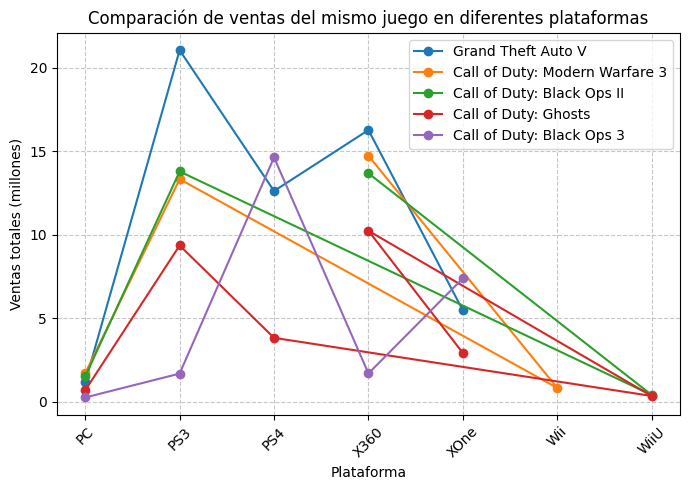


platform                              3DS    DS    PC  PS2   PS3   PS4  PSP  \
name                                                                          
 Frozen: Olaf's Quest                0.59  0.51   NaN  NaN   NaN   NaN  NaN   
2014 FIFA World Cup Brazil            NaN   NaN   NaN  NaN  0.61   NaN  NaN   
3rd Super Robot Wars Z Jigoku Hen     NaN   NaN   NaN  NaN  0.23   NaN  NaN   
3rd Super Robot Wars Z: Tengoku-Hen   NaN   NaN   NaN  NaN  0.15   NaN  NaN   
7 Days to Die                         NaN   NaN   NaN  NaN   NaN  0.14  NaN   
...                                   ...   ...   ...  ...   ...   ...  ...   
Zumba Fitness Core                    NaN   NaN   NaN  NaN   NaN   NaN  NaN   
Zumba Fitness: World Party            NaN   NaN   NaN  NaN   NaN   NaN  NaN   
[Prototype 2]                         NaN   NaN  0.11  NaN  0.74   NaN  NaN   
de Blob 2                             NaN  0.11   NaN  NaN  0.21   NaN  NaN   
uDraw Studio: Instant Artist          NaN   NaN   N

In [59]:
 #Paso 1: Encontrar juegos que aparecen en múltiples plataformas
juegos_multiplataforma = last_5_years['name'].value_counts()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1].index.tolist()

# Paso 2: Filtrar el dataframe original para incluir solo estos juegos
games_multi = last_5_years[last_5_years['name'].isin(juegos_multiplataforma)]

# Paso 3: Agrupar por nombre de juego y plataforma, y calcular ventas totales
comparacion_ventas = games_multi.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Paso 4: Convertir a formato de tabla pivote para comparar más fácilmente
tabla_comparativa = comparacion_ventas.pivot(index='name', columns='platform', values='total_sales')

#Limitar a los juegos con más ventas para simplificar la visualización
top_juegos = games_multi.groupby('name')['total_sales'].sum().nlargest(10).index
tabla_top_juegos = tabla_comparativa.loc[top_juegos]

plt.figure(figsize=(7,5))
for juego in top_juegos[:5]:  # Limitamos a 5 juegos para mejor visualización
    datos_juego = comparacion_ventas[comparacion_ventas['name'] == juego]
    plt.plot(datos_juego['platform'], datos_juego['total_sales'], 'o-', label=juego)

plt.title('Comparación de ventas del mismo juego en diferentes plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print()
print(tabla_comparativa)

Vemos que:

* PS3, PS4, X360 presentan buenas ventas para el juego GTA

* En este gráfico podemos ver lo que veíamos en el gráfico anterior, la plataforma PS3 tiene ventas variadas según el juego (independientemente de las críticas)

* En este gráfico, podemos ver que las plataformas correspondientes a Wii, tienen muy pocas ventas en comparación a las otras.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [38]:
genre_sales = last_5_years.groupby('genre')['total_sales'].sum()
print(genre_sales.sort_values(ascending=False))

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64


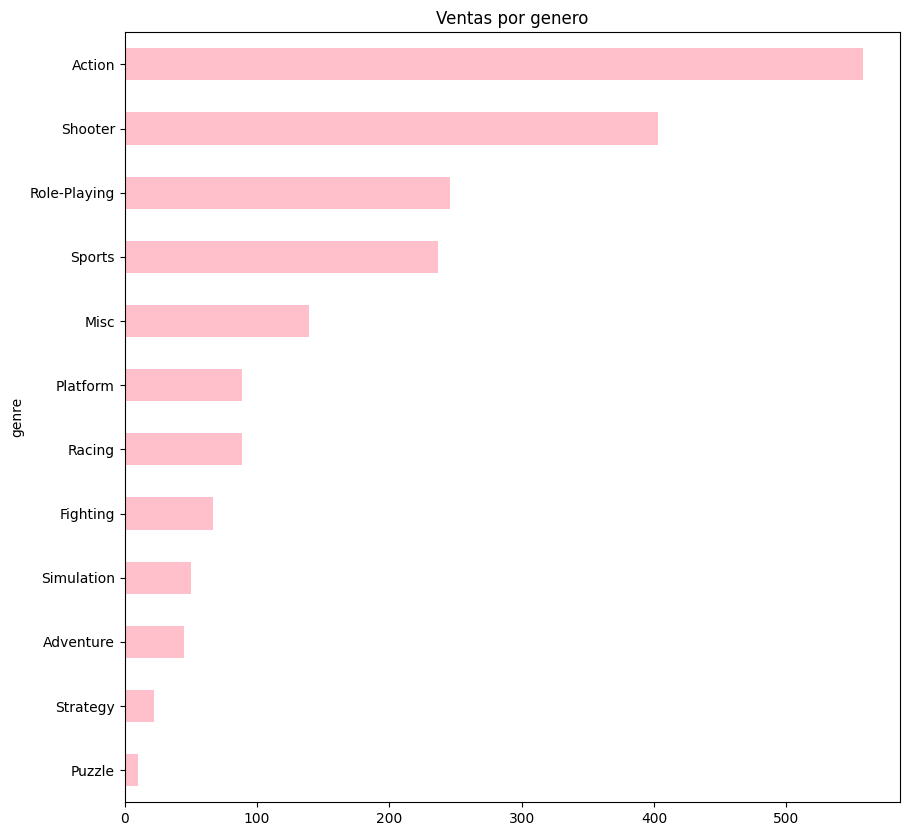

In [39]:
genre_sales_sorted = genre_sales.sort_values(ascending=True)
genre_sales_sorted.plot(x='total_sales',y='genre',kind='barh',figsize=[10,10],title='Ventas por genero',color='pink')
plt.show()

In [40]:
genre_platform = last_5_years.groupby(['genre','platform'])['total_sales'].sum()
genre_platform_df = genre_platform.reset_index()
print(genre_platform_df.sort_values(by='total_sales',ascending=False).head(10))

            genre platform  total_sales
4          Action      PS3       159.59
95        Shooter     X360       118.26
10         Action     X360       109.92
90        Shooter      PS3       100.16
5          Action      PS4        96.10
91        Shooter      PS4        88.56
76   Role-Playing      3DS        84.20
112        Sports      PS3        62.45
96        Shooter     XOne        60.33
0          Action      3DS        57.84


In [66]:
genre_platform_mean = last_5_years.groupby('genre')['total_sales'].mean()
genre_platform_mean_df = genre_platform_mean.reset_index()
#print(genre_platform_mean_df.sort_values(by='total_sales',ascending=False).head(10))
genre_sales_mean_sorted = genre_platform_mean_df.sort_values(by='total_sales',ascending=False)
print(genre_sales_mean_sorted)

           genre  total_sales
8        Shooter     1.224650
4       Platform     0.726885
10        Sports     0.609640
7   Role-Playing     0.528237
6         Racing     0.490611
0         Action     0.439559
2       Fighting     0.420755
3           Misc     0.371787
9     Simulation     0.369559
11      Strategy     0.189402
5         Puzzle     0.138732
1      Adventure     0.109854


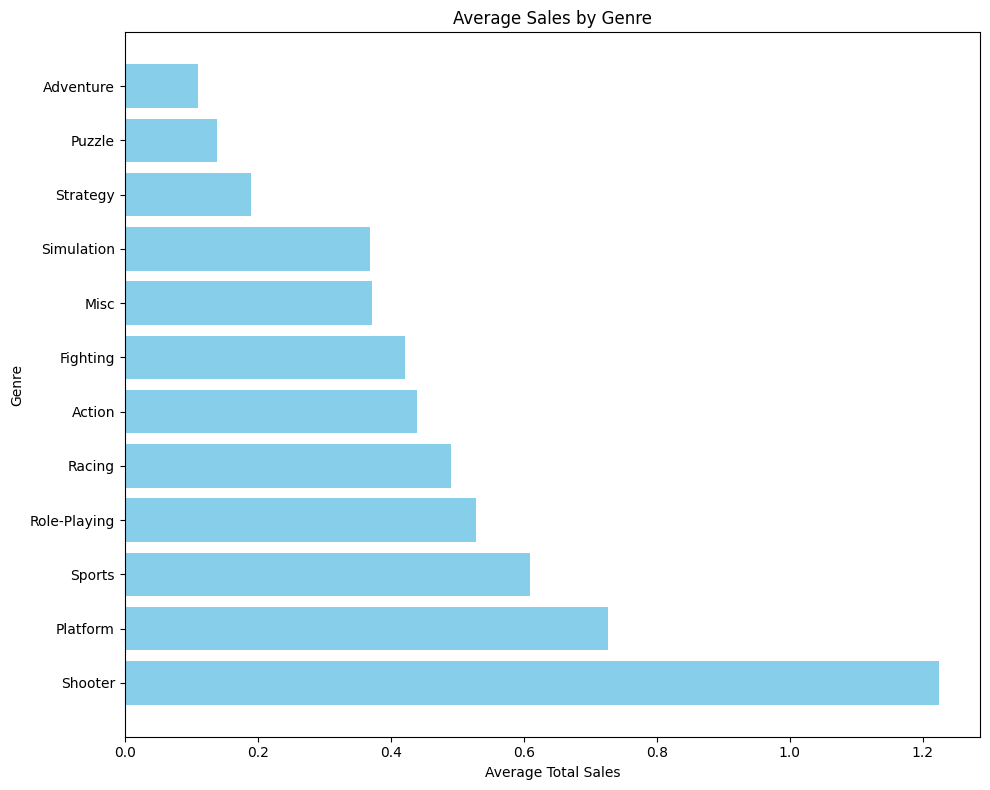

In [68]:
import matplotlib.pyplot as plt

# Plot horizontal bar chart (easier to read genre names)
plt.figure(figsize=(10, 8))
plt.barh(genre_sales_mean_sorted['genre'], genre_sales_mean_sorted['total_sales'], color='skyblue')
plt.xlabel('Average Total Sales')
plt.ylabel('Genre')
plt.title('Average Sales by Genre')
plt.tight_layout()
plt.show()

En base a los análisis que hemos hecho, podemos ver que:

* Los 5 géneros que más ventas tienen son: Action, Sports, Shooter, Role-Playing, Misc
* En comparacion con el grafico anterior, los generos con una media mas alta son:Shooter, Platform, Sports, Role-Playing, Racing.
    * Esto no quiere decir que hayan tenido mayores ventas, puede significar que tenga valores atípicos que puedan estar afectando la media.
* En base a los géneros más vendidos, las plataformas con más ventas son: PS3, X360, PS4,XOne, 3DS


## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Para cada región (NA, UE, JP) determina: Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [41]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [42]:
na_sales_platform = last_5_years.groupby('platform')['na_sales'].sum()
na_sales_platform_df = na_sales_platform.reset_index()
na_sales_sorted = na_sales_platform_df.sort_values(by='na_sales',ascending=False)
print(na_sales_sorted.head(10))

   platform  na_sales
10     X360    226.80
4       PS3    168.26
5       PS4    108.74
11     XOne     93.12
0       3DS     82.65
8       Wii     48.56
9      WiiU     38.10
2        PC     29.88
1        DS     18.86
7       PSV     12.47


In [43]:
eu_sales_platform = last_5_years.groupby('platform')['eu_sales'].sum()
eu_sales_platform_df = eu_sales_platform.reset_index()
eu_sales_sorted = eu_sales_platform_df.sort_values(by='eu_sales',ascending=False)
print(eu_sales_sorted.head(10))

   platform  eu_sales
4       PS3    163.10
5       PS4    141.09
10     X360    117.10
0       3DS     61.27
2        PC     56.70
11     XOne     51.59
8       Wii     29.60
9      WiiU     25.13
7       PSV     13.07
1        DS      9.24


In [44]:
jp_sales_platform = games.groupby('platform')['jp_sales'].sum()
jp_sales_platform_df = jp_sales_platform.reset_index()
jp_sales_sorted = jp_sales_platform_df.sort_values(by='jp_sales',ascending=False)
print(jp_sales_sorted.head(10))

   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67
11      NES     98.65
5        GB     85.12
17      PS3     80.19
19      PSP     76.78
26      Wii     69.33


In [45]:
other_sales_platform = last_5_years.groupby('platform')['other_sales'].sum()
other_sales_platform_df = other_sales_platform.reset_index()
other_sales_sorted = other_sales_platform_df.sort_values(by='other_sales',ascending=False)
print(other_sales_sorted.head(10))

   platform  other_sales
4       PS3        64.82
5       PS4        48.35
10     X360        33.13
11     XOne        14.27
0       3DS        13.27
2        PC        11.10
8       Wii         7.89
7       PSV         6.43
9      WiiU         5.95
1        DS         2.59


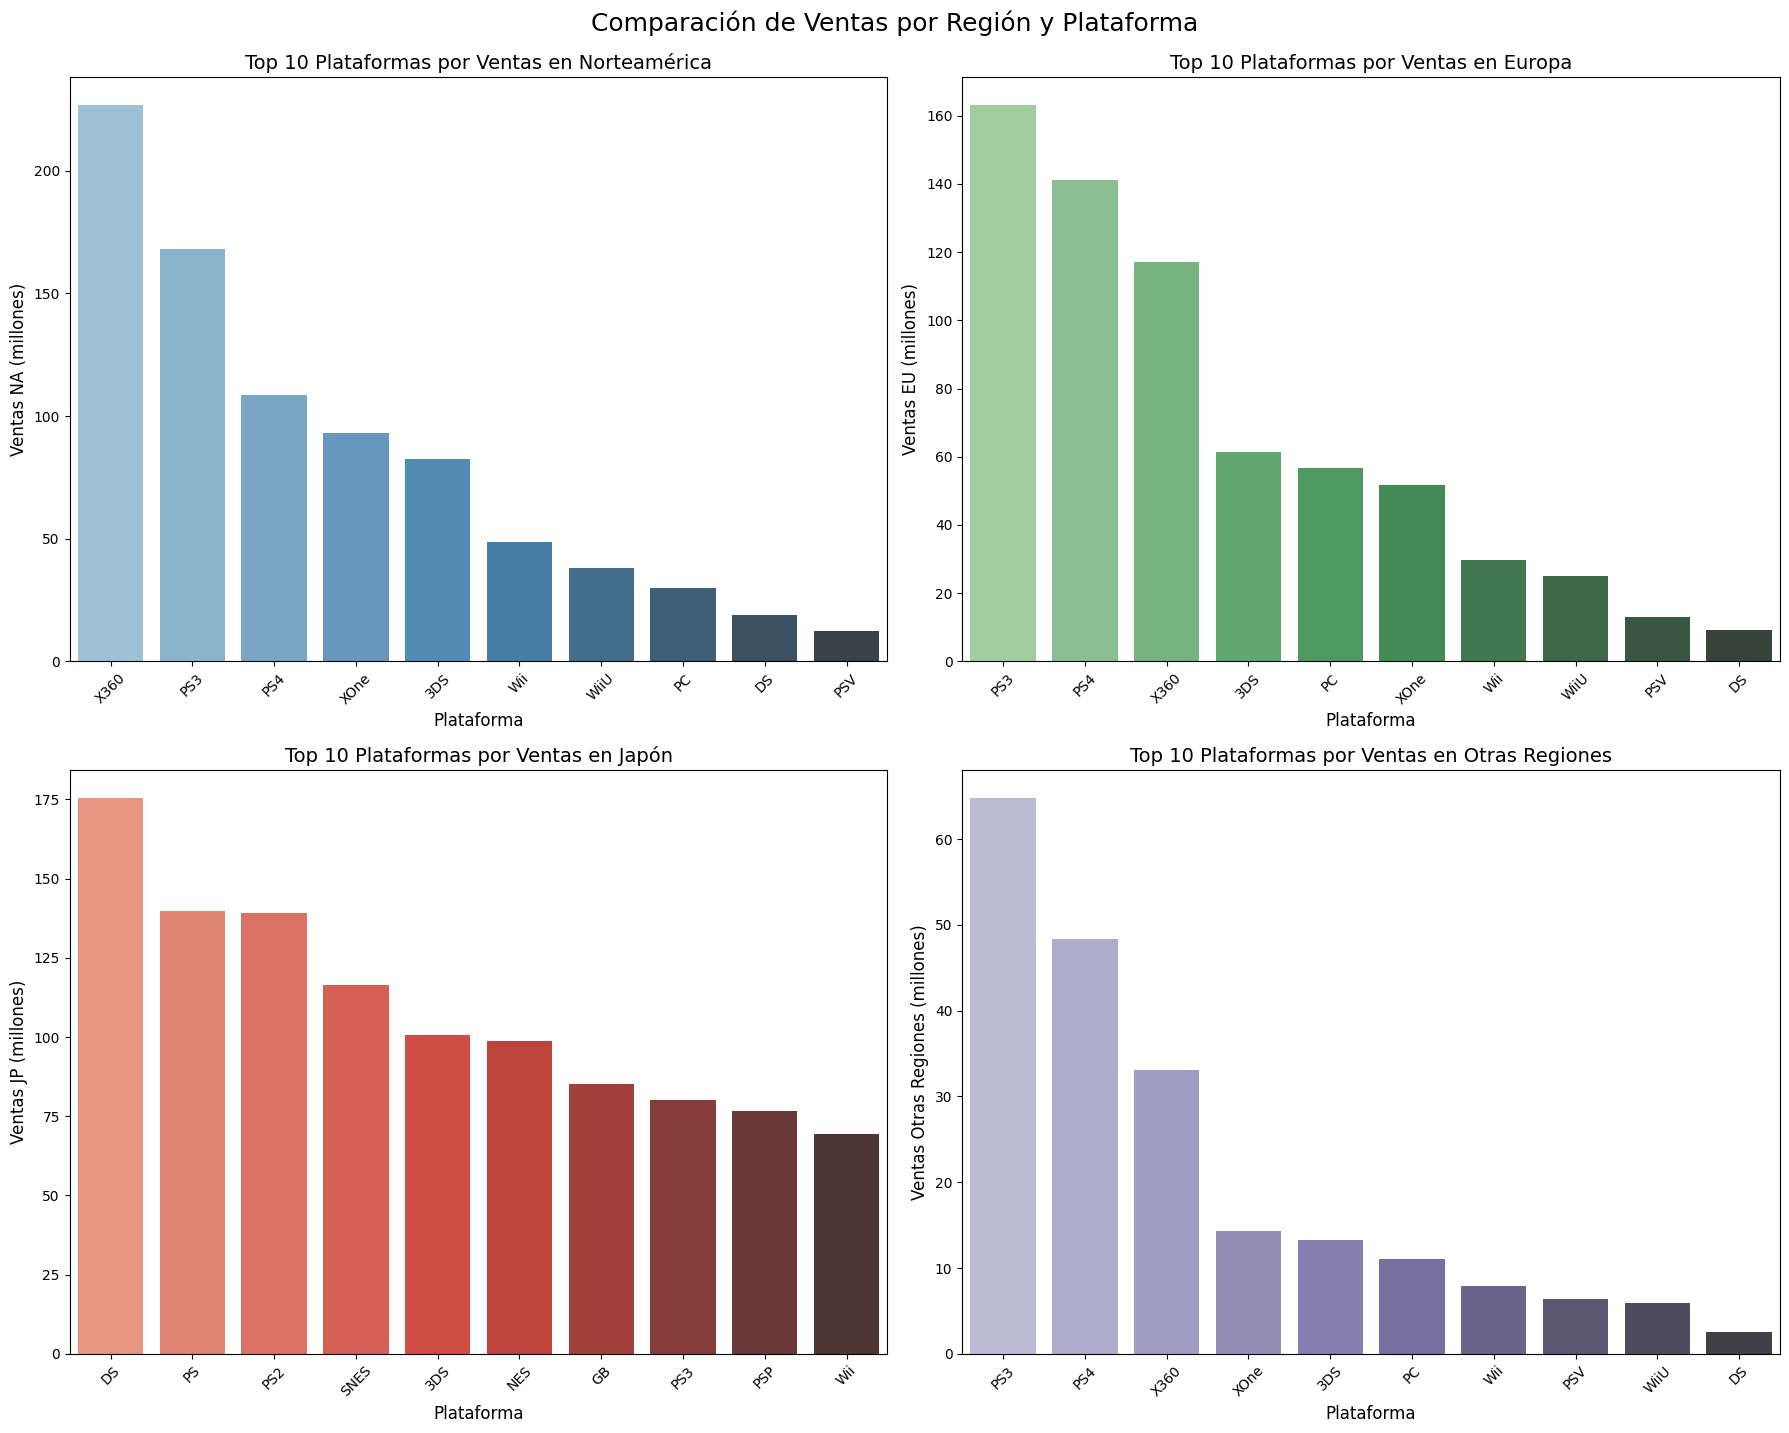

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 4 subplots en una cuadrícula 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico 1: Ventas en Norteamérica (esquina superior izquierda)
sns.barplot(x='platform', y='na_sales', data=na_sales_sorted.head(10), ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Top 10 Plataformas por Ventas en Norteamérica', fontsize=14)
axes[0, 0].set_xlabel('Plataforma', fontsize=12)
axes[0, 0].set_ylabel('Ventas NA (millones)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Ventas en Europa (esquina superior derecha)
sns.barplot(x='platform', y='eu_sales', data=eu_sales_sorted.head(10), ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('Top 10 Plataformas por Ventas en Europa', fontsize=14)
axes[0, 1].set_xlabel('Plataforma', fontsize=12)
axes[0, 1].set_ylabel('Ventas EU (millones)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Ventas en Japón (esquina inferior izquierda)
sns.barplot(x='platform', y='jp_sales', data=jp_sales_sorted.head(10), ax=axes[1, 0], palette='Reds_d')
axes[1, 0].set_title('Top 10 Plataformas por Ventas en Japón', fontsize=14)
axes[1, 0].set_xlabel('Plataforma', fontsize=12)
axes[1, 0].set_ylabel('Ventas JP (millones)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Ventas en Otras Regiones (esquina inferior derecha)
sns.barplot(x='platform', y='other_sales', data=other_sales_sorted.head(10), ax=axes[1, 1], palette='Purples_d')
axes[1, 1].set_title('Top 10 Plataformas por Ventas en Otras Regiones', fontsize=14)
axes[1, 1].set_xlabel('Plataforma', fontsize=12)
axes[1, 1].set_ylabel('Ventas Otras Regiones (millones)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.suptitle('Comparación de Ventas por Región y Plataforma', fontsize=18, y=1.02)
plt.show()

A través de estos gráficos podemos ver:

* Las ventas en Europa y las ventas en Otras regiones se parecen.
* Las plataformas con más ventas en Japón son las que más difieren del resto.
* Podemos ver que la plataforma PS2 aparece en los cuatro gráficos con buenas ventas.


Top 5 plataformas en Norteamerica:

* X360
* PS3
* PS4
* XOne
* 3DS

Top 5 plataformas en Europa:

* PS3
* PS4
* X360
* 3DS
* PC

Top 5 plataformas en Japon:

* DS
* PS
* PS2
* SNES
* 3DS

### Los cinco géneros principales. Explica la diferencia.

In [47]:
na_sales_genre = last_5_years.groupby('genre')['na_sales'].sum()
na_sales_genre_df = na_sales_genre.reset_index()
na_sales_genre_sorted = na_sales_genre_df.sort_values(by='na_sales',ascending=False)
print(na_sales_genre_sorted.head())

           genre  na_sales
0         Action    230.92
8        Shooter    194.43
10        Sports    108.70
7   Role-Playing     83.78
3           Misc     69.69


In [48]:
eu_sales_genre = last_5_years.groupby('genre')['eu_sales'].sum()
eu_sales_genre_df = eu_sales_genre.reset_index()
eu_sales_genre_sorted = eu_sales_genre_df.sort_values(by='eu_sales',ascending=False)
print(eu_sales_genre_sorted.head())

           genre  eu_sales
0         Action    199.12
8        Shooter    148.02
10        Sports     88.48
7   Role-Playing     62.30
6         Racing     40.58


In [49]:
jp_sales_genre = last_5_years.groupby('genre')['jp_sales'].sum()
jp_sales_genre_df = jp_sales_genre.reset_index()
jp_sales_genre_sorted = jp_sales_genre_df.sort_values(by='jp_sales',ascending=False)
print(jp_sales_genre_sorted.head())

          genre  jp_sales
7  Role-Playing     79.87
0        Action     63.62
3          Misc     17.60
2      Fighting     12.38
4      Platform     12.13


Entre los géneros de juegos principales por región, podemos ver que:

* Los géneros que están presentes en todas las regiones son: Action, Misc
* Estados Unidos y Europa tienen preferencias casi idénticas, solo varían en un género (EEUU: Misc, Europa: Racing)
* La región con gustos diferentes es Japón.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [50]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [51]:
na_classification_sales = last_5_years.groupby('rating')['na_sales'].sum()
na_classification_sales_df = na_classification_sales.reset_index()
na_classification_sorted = na_classification_sales_df.sort_values(by='na_sales',ascending=False)

print(na_classification_sorted)

    rating  na_sales
3        M    308.45
0        E    170.17
6  unknown    123.69
1     E10+    117.72
5        T    109.31
2       EC      0.42
4       RP      0.00


In [52]:
eu_classification_sales = last_5_years.groupby('rating')['eu_sales'].sum()
eu_classification_sales_df = eu_classification_sales.reset_index()
eu_classification_sorted = eu_classification_sales_df.sort_values(by='eu_sales',ascending=False)

print(eu_classification_sorted)

    rating  eu_sales
3        M    250.26
0        E    141.73
6  unknown    116.61
5        T     83.16
1     E10+     78.00
4       RP      0.03
2       EC      0.00


In [53]:
jp_classification_sales = last_5_years.groupby('rating')['jp_sales'].sum()
jp_classification_sales_df = jp_classification_sales.reset_index()
jp_classification_sorted = jp_classification_sales_df.sort_values(by='jp_sales',ascending=False)

print(jp_classification_sorted)

    rating  jp_sales
6  unknown    138.21
0        E     36.68
5        T     33.39
3        M     26.14
1     E10+     11.23
2       EC      0.00
4       RP      0.00


Podemos ver que en realidad si importa la clasificación de los juegos. Ya que:

* En las regiones de EEUU y Europa, de nuevo notamos similitudes, los juegos M (mature) y E (everyone), son los que presentan mayores ventas
* En Japón, las mayores ventas se las llevan E (everyone) y T (teen)
* Para Japón, se deben enfocar las publicidades de manera diferente, ya que allí la consumición de usuarios varía de las otras regiones

## Prueba las siguientes hipótesis:


### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [54]:
#filtrar por plataforma
pc_ratings = last_5_years[last_5_years['platform']=='PC']['user_score']
xone_ratings = last_5_years[last_5_years['platform']=='XOne']['user_score']

pc_mean = pc_ratings.mean()
xone_mean = xone_ratings.mean() 

print('La media de PC es:',pc_mean)
print('La media de Xbox One es:',xone_mean)
print()

#prueba t
from scipy import stats

t_stat, p_value = stats.ttest_ind(pc_ratings, xone_ratings, equal_var=False)
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")
print()

#resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa entre las calificaciones.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones son diferentes.")    

La media de PC es: 5.091773778920309
La media de Xbox One es: 4.805263157894737

Estadístico t: 1.1477430738836862
Valor p: 0.2516134642449984

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones son diferentes.


*En base al resultado de nuestra hipotesis, no hay una diferencia significativa entre las calificaciones. Es decir, no hay evidencia estadística de que sean diferentes.*

* H₀ (hipótesis nula): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
* H₁ (hipótesis alternativa): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


Elegimos alpha como 0.05 ya que es uno de los mayormente aceptados, y tambien, tiene un margen aceptable de error y acierto.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [55]:
#filtramos por genero
action_rating = last_5_years[last_5_years['genre']=='Action']['user_score']
sports_rating = last_5_years[last_5_years['genre']=='Sports']['user_score']

# calculamos la media
action_mean = action_rating.mean()
sports_mean = sports_rating.mean()

print('La media de Acción es:',action_mean)
print('La media de Deportes es:',sports_mean)
print()

t_stat, p_value = stats.ttest_ind(action_rating, sports_rating, equal_var=False)
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")
print()


alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia estadística de que las calificaciones promedio de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.")

La media de Acción es: 3.5454688731284474
La media de Deportes es: 3.5735218508997426

Estadístico t: -0.15306361145850758
Valor p: 0.8783901650204686

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.


En base al resultado de nuestra hipotesis, no hay una diferencia significativa entre las calificaciones. Es decir las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.

* H₀ (hipótesis nula): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* H₁ (hipótesis alternativa): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Elegimos alpha como 0.05 ya que es uno de los mayormente aceptados, y tambien, tiene un margen aceptable de error y acierto.

## Conclusión

Nuestro objetivo en este análisis fue el determinar las tendencias del año 2016, las cuáles serán utilizadas para elaborar campañas de publicidad en el año 2017.

Nuestros hallazgos fueron:

* Las regiones de Europa y Estados Unidos tienen comportamientos de consumo parecidos, por lo que el equipo de marketing de ambas regiones pueden compartir estrategias (lo cual agilizará el lanzamiento de las campañas).

* La región de Japón presenta gustos diferentes, es por eso que, se recomienda que para la realización de campañas, en el equipo haya por lo menos una persona que forme parte de la región. Esto se debe a que en caso de solo sean extranjeros quienes realicen la campaña, existe un riesgo alto de que no se alcance lo esperado. 

* Podemos ver que los géneros de mayor venta fueron: acción, deportes y miscelánea. Por lo tanto, sería apropiado enfocar la mayor cantidad de campañas a ese sector.

* A través de los análisis, pudimos ver que la clasificación de los juegos si afecta a las ventas:

    * Para las regiones de EEUU y Europa, la clasificación con más ventas es M (mature), esto significa que es consumido por personas mayores a 18 años. Se recomienda averiguar la franja etaria de los usuarios con mayor consumición, para así enfocar las estrategias de marketing correctamente. Por ejemplo, para la franja etaria de 18 a 25 años, los influencers de Twitch y tiktok tendrían más relevancia. Para las edades de 26 a 35, Instagram sería una mejor opción. Y para los más adultos, anuncios en Facebook podrían utilizarse.
    * En Japón, la clasificación "E" (apta para todo público) tiene la mayor cantidad de ventas. Esto puede deberse a que en este grupo están incluidos los niños. Se recomienda que los juegos de esta clasificación sean publicitados en áreas dónde los niños puedan acceder a ellos, por ejemplo, en los parques de juego o en los comerciales de programas infantiles.

* La PS3 es la única plataforma que aparece en el top 5 de Norteamérica y Europa. Por lo tanto, publicitar juegos pertenecientes a esta plataforma generaría mayores ingresos.

* En Japón, la gama de PS no tiene mucha cantidad de usuarios. Es por eso, que las publicidades deben enfocarse en las otras plataformas como: DS, SNES, 3DS.